In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font = {'size': 22}

matplotlib.rc('font', **font)

import numpy as np
import pandas as pd

import scipy
import scipy.stats
import seaborn as sns

import sklearn.datasets

import mrob

<AxesSubplot:>

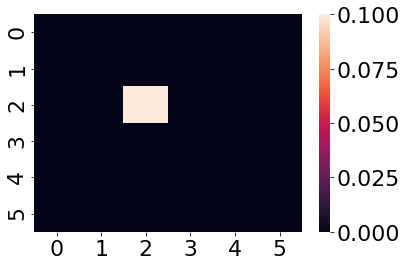

In [3]:
sigma = sklearn.datasets.make_spd_matrix(6)*1e-5
sigma = np.eye(6)
sigma[0,0] = 1e-10
sigma[1,1] = 1e-10
sigma[2,2] = 1e-1
sigma[3,3] = 1e-10
sigma[4,4] = 1e-10
sigma[5,5] = 1e-10
mu = np.array([0,0,0,0,0,0])
sns.heatmap(sigma)

In [4]:
n = scipy.stats.multivariate_normal(mu,sigma)

In [5]:
n.rvs()

array([-3.42789662e-06,  5.00792805e-06, -1.36376478e-01,  1.74992802e-05,
       -1.26560381e-05,  1.72040674e-06])

<AxesSubplot:>

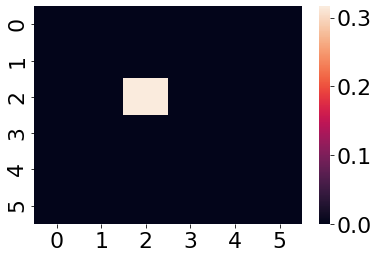

In [6]:
A = np.linalg.cholesky(sigma)
sns.heatmap(A)

In [7]:
def rotate(l, n):
    return l[-n:] + l[:-n]

In [8]:
points = []
points.append([0,0,1,0,0,0])
points.append([0,0,-1,0,0,0])
points.append([0,0,0,1,0,0])
points.append([0,0,0,-1,0,0])


labels = ['+yaw','-yaw','+x','-x']
# x = [1,0,0,0,0,0]

# for _ in range(6):
#     points.append(x)
#     x = rotate(x,1)
    
# x = [-1,0,0,0,0,0]

# for _ in range(6):
#     points.append(x)
#     x = rotate(x,1)

N = 100
for i in range(N):
    points.append([0,0,0,1*np.cos(2*np.pi/N*i), 1*np.sin(2*np.pi/N*i),0])

points = np.array(points)
points

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.98026728e-01,  6.27905195e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.92114701e-01,  1.25333234e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.82287251e-01,  1.87381315e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.000

In [9]:
points_img = np.dot(A,points.transpose()).transpose()

In [10]:
points_img

array([[ 0.00000000e+00,  0.00000000e+00,  3.16227766e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.16227766e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e-05,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.00000000e-05,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e-05,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.98026728e-06,  6.27905195e-07,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.92114701e-06,  1.25333234e-06,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.82287251e-06,  1.87381315e-06,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.000

In [11]:
propagated = []


for i in range(len(points_img)):
    tmp = mrob.geometry.SE3([0,0,0,0.0,0,0])
    tmp.update_lhs(points_img[i])
    propagated.append(tmp)

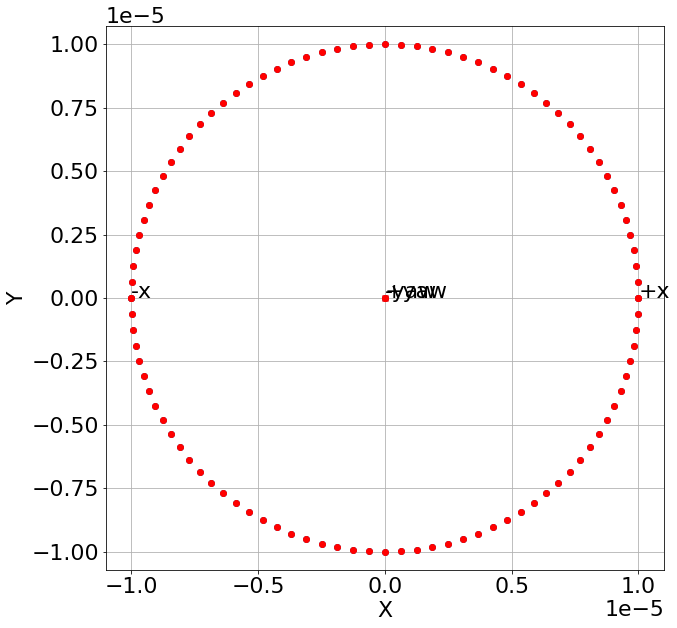

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

poses = np.array([x.t() for x in propagated])
poses = poses.reshape((-1,3))

plt.scatter(poses[:,0],poses[:,1])

for i in range(len(points_img)):
    plt.plot(poses[i,0],poses[i,1],'o', color='red')
    

for i in range(len(labels)):
    plt.annotate(labels[i],(poses[i,0],poses[i,1]))
    
plt.plot(0,0,'x',color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis('equal')
plt.show()

# yaw and x

In [13]:
points = []
points.append([0,0,1,0,0,0])
points.append([0,0,-1,0,0,0])
points.append([0,0,0,1,0,0])
points.append([0,0,0,-1,0,0])


labels = ['+yaw','-yaw','+x','-x']
# x = [1,0,0,0,0,0]

# for _ in range(6):
#     points.append(x)
#     x = rotate(x,1)
    
# x = [-1,0,0,0,0,0]

# for _ in range(6):
#     points.append(x)
#     x = rotate(x,1)

N = 100
for i in range(N):
    points.append([0,0,1*np.cos(2*np.pi/N*i), 1*np.sin(2*np.pi/N*i),0,0])

points = np.array(points)
points

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  9.98026728e-01,
         6.27905195e-02,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  9.92114701e-01,
         1.25333234e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  9.82287251e-01,
         1.87381315e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  9.685

In [14]:
points_img = np.dot(A,points.transpose()).transpose()

In [15]:
propagated = []


for i in range(len(points_img)):
    tmp = mrob.geometry.SE3([0,0,0,0.0,0,0])
    tmp.update_lhs(points_img[i])
    propagated.append(tmp)

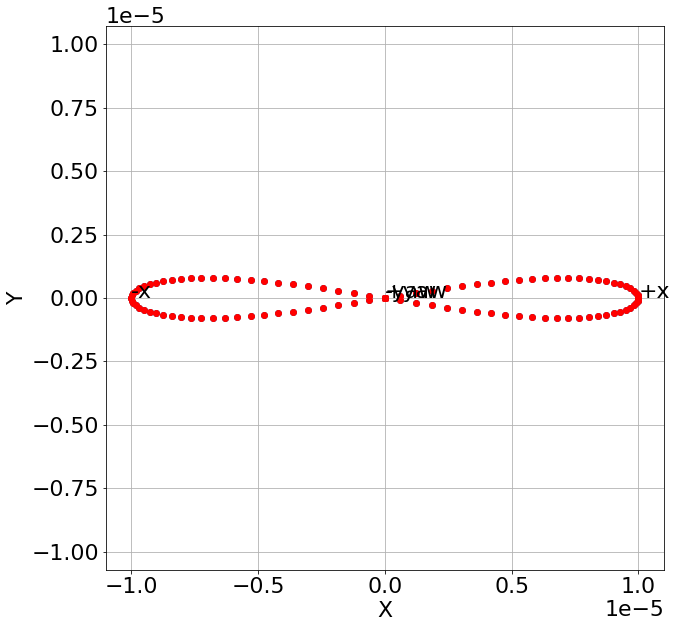

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

poses = np.array([x.t() for x in propagated])
poses = poses.reshape((-1,3))

plt.scatter(poses[:,0],poses[:,1])

for i in range(len(points_img)):
    plt.plot(poses[i,0],poses[i,1],'o', color='red')
    

for i in range(len(labels)):
    plt.annotate(labels[i],(poses[i,0],poses[i,1]))
    
plt.plot(0,0,'x',color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis('equal')
plt.show()